In [1]:
from physionet2023.dataProcessing.datasets import PatientDataset
from scipy.signal import spectrogram
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
GOOD_OUTCOME_IDX = 0
BAD_OUTCOME_IDX = 300

pds = PatientDataset()
patient_metadata, recording_metadata, recordings = pds[300]
len(recordings)

27

<AxesSubplot:>

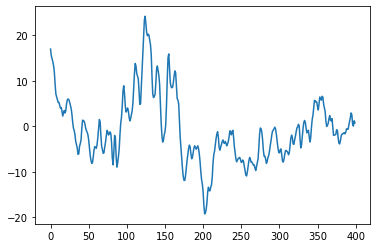

In [3]:
test_eeg = recordings[0][0,:]

subsample = test_eeg[100:500]
sns.lineplot(x=range(0, len(subsample)), y=subsample)

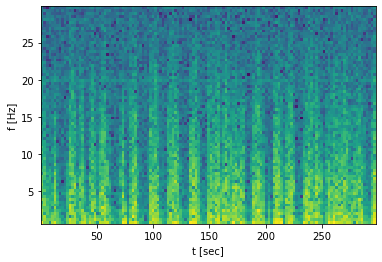

In [4]:
f, t, s = spectrogram(test_eeg, 100.)

# Trim to freq of interest (0.5 - 30 Hz)
freq_filter = np.logical_and(f > 0.5, f < 30)
s = s[freq_filter]
f = f[freq_filter]
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.pcolormesh(t, f, np.log10(s))


In [5]:
patient_metadata

{'Patient': 'ICARE_0677',
 'Age': '64',
 'Sex': 'Male',
 'ROSC': '1',
 'OHCA': 'False',
 'VFib': 'True',
 'TTM': '33',
 'Outcome': 'Poor',
 'CPC': '5',
 '': ''}

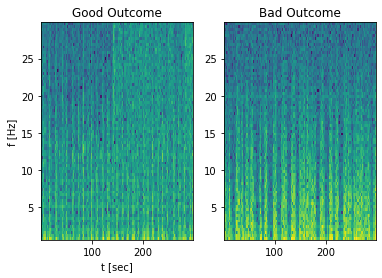

In [7]:
def get_spectrogram(raw_recording):
    eeg = raw_recording[0][0,:]

    f, t, s = spectrogram(eeg, 100.)

    # Trim to freq of interest (0.5 - 30 Hz)
    freq_filter = np.logical_and(f > 0.5, f < 30)
    s = s[freq_filter]
    f = f[freq_filter]


    return f, t, np.log10(s)

_, _, good_recordings = pds[GOOD_OUTCOME_IDX]
_, _, bad_recordings = pds[BAD_OUTCOME_IDX]

good_f, good_t, good_s = get_spectrogram(good_recordings)
bad_f, bad_t, bad_s = get_spectrogram(bad_recordings)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
#plt.subplot(1, 2, 1)
ax1.title('Good Outcome')
ax1.ylabel('f [Hz]')
ax1.xlabel('t [sec]')
ax1.pcolormesh(good_t, good_f, good_s)


#plt.subplot(1, 2, 2)
ax2.title('Bad Outcome')
ax2.ylabel('f [Hz]')
ax2.xlabel('t [sec]')
ax2.pcolormesh(bad_t, bad_f, bad_s)

